First, we import all the modules and define the plot parameters

In [13]:
import matplotlib.pyplot as plt
import json
import numpy as np
from tensorflow.python.summary.summary_iterator import summary_iterator

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

The root selects the model you want to visualize, in this case is the one used in the report. For the validation loss, the entire data stream was used (without removing any peakless chunk), therefore the loss is lower.

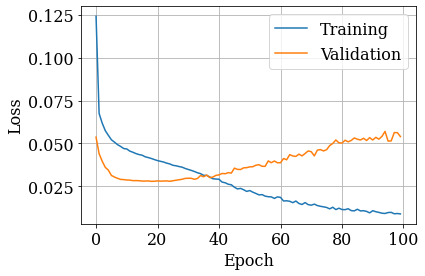

In [38]:
root = 'logs/2012012257'

training_loss = []
validation_loss = []

for e in summary_iterator(root + '/Training_train_loss/events.out.tfevents.1606860072.DESKTOP-7UI2G40.17596.5'):
    for v in e.summary.value:
        training_loss.append(v.simple_value) 
        
for e in summary_iterator(root + '/Validation_val_loss/events.out.tfevents.1606860072.DESKTOP-7UI2G40.17596.1'):
    for v in e.summary.value:
        validation_loss.append(v.simple_value)
        #print(v.tensor)

#epoch = np.arange(1,len(training_loss))
plt.plot(training_loss, label = 'Training')
plt.plot(validation_loss, label = 'Validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

We import the the test results corresponding to the trained model at epoch 20 (where the best validation accuracy was achieved), which are located in the folder logs. In this case the one used in the report. Also the current algorithm performance that is stored in the alg_performance folder.

In [8]:
root = 'logs/2012012257'

with open(root + '/test_result.json' , 'r') as file:
    test_results = json.load(file)

with open('alg_performance/low.json' , 'r') as file:
    low_per = json.load(file)    

with open('alg_performance/high.json' , 'r') as file:
    high_per = json.load(file) 

We take the variables needed that were stored in the json file

In [4]:
TP = np.array(test_results['TP'])
TC = np.array(test_results['TC'])
FP = np.array(test_results['FP'])
PNR = np.array(test_results['PNR'])
sort = np.argsort(PNR)
Counts = np.array(test_results['Counts'])

TP_low = np.array(low_per['TP'])
TC_low = np.array(low_per['TC'])
FP_low = np.array(low_per['FP'])
PNR_low = np.array(low_per['PNR'])

TP_high = np.array(high_per['TP'])
TC_high = np.array(high_per['TC'])
FP_high = np.array(high_per['FP'])
PNR_high = np.array(high_per['PNR'])

Then, we plot the comparison between the current model and the U-Net for two different test benches

Text(0.5, 1.0, 'More than 1000 counts')

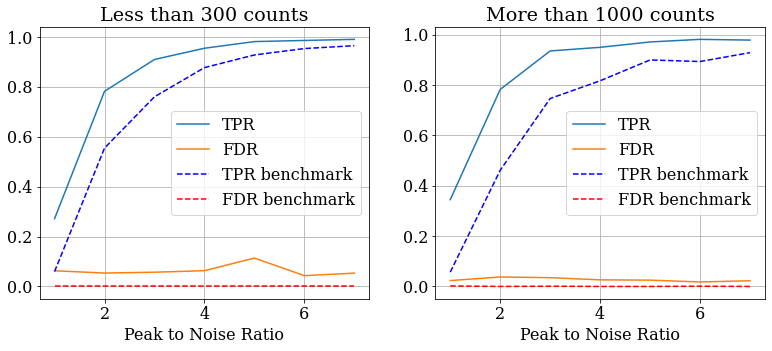

In [7]:
plt.figure(figsize=(13,5))

idx = Counts[sort] < 300
plt.subplot(121)
plt.plot(PNR[sort][idx] , TP[sort][idx] / TC[sort][idx] , label = 'TPR') 
plt.plot(PNR[sort][idx] , FP[sort][idx] / TC[sort][idx], label = 'FDR')
plt.plot(PNR_low, TP_low / TC_low, '--b', label = 'TPR benchmark')
plt.plot(PNR_low, FP_low / TC_low, '--', color = 'red', label = 'FDR benchmark')
plt.grid('on')
plt.xlabel('Peak to Noise Ratio')
plt.title('Less than 300 counts')
plt.legend()

idx = np.invert(idx)
plt.subplot(122)
plt.plot(PNR[sort][idx] , TP[sort][idx] / TC[sort][idx], label = 'TPR')
plt.plot(PNR[sort][idx] , FP[sort][idx] / TC[sort][idx], label = 'FDR')
plt.plot(PNR_high, TP_high / TC_high, '--b', label = 'TPR benchmark')
plt.plot(PNR_high, FP_high / TC_high, '--', color = 'red', label = 'FDR benchmark')
plt.grid('on')
plt.xlabel('Peak to Noise Ratio')
plt.legend()
plt.title('More than 1000 counts')